In [1]:
! pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
sns.set_theme()
print



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [32]:
f_base = "20241014140946.csv_stats_history.csv"
# filename2 = "replica/20241014144523.csv_stats_history.csv"
# filename3 = "high/20241014125510.csv_stats_history.csv"
df_base_hist = pd.read_csv("./results/base/" + f_base, on_bad_lines="skip")
# df_hist2 = pd.read_csv("./results/" + filename2, on_bad_lines="skip")
# df_hist3 = pd.read_csv("./results/" + filename3, on_bad_lines="skip")
f_base_mon = "20241014140946-monitoring.log"
df_base_mon = pd.read_csv("./results/base/" + f_base_mon, on_bad_lines="skip")
df_base_mon['date'] = pd.to_datetime(df_base_mon[' timestamp'],unit='s')



In [15]:
from itertools import product

In [77]:
services =[ "celery",
            "geonode",
            "geoserver",
            "memcached",
            "nginx",
            "postgres",
            "pycsw",
            "rabbitmq"
]
stats = [" cpu"," mem"]
MEMHELP =     lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
CPUHELP =     lambda x: int(x.split('n')[0])

data = []

last_r = {}
for i,r in df_base_hist.iterrows():
    r = dict(r)
    for stat,service in product(stats, services):
        key = f"{service}_{stat}"
        df_base_hist[key] = df_base_hist['Timestamp'] * 0 -1

        # break
        last_cpu = None
        last_mem = None
        # print(df_base_mon[(df_base_mon.name == service) & (df_base_mon[' timestamp'] == r['Timestamp'])][stat].values[0])
        try:
            r[key] = df_base_mon[(df_base_mon.name == service) & (df_base_mon[' timestamp'] == r['Timestamp'])][stat].values[0]
            
            if stat == ' mem':
                last_mem =  MEMHELP(r[key])
                r[key] = last_mem
            if stat == ' cpu':
                last_cpu =  CPUHELP(r[key])
                r[key] = last_cpu
            
            last_r = dict(r)
        except:
            r[key] = last_r[key]
             

    # print(r,key)    
    data.append(r)

df = pd.DataFrame(data)

df["total_cpu"] = df[[x for x in df.columns if "cpu" in x]].sum(axis=1)
df["total_mem"] = df[[x for x in df.columns if "mem" in x]].sum(axis=1)

# generate date
df['date'] = pd.to_datetime(df['Timestamp'],unit='s')



In [87]:
df.columns

Index(['Timestamp', 'User Count', 'Type', 'Name', 'Requests/s', 'Failures/s',
       '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%', '99.9%',
       '99.99%', '100%', 'Total Request Count', 'Total Failure Count',
       'Total Median Response Time', 'Total Average Response Time',
       'Total Min Response Time', 'Total Max Response Time',
       'Total Average Content Size', 'celery_ cpu', 'geonode_ cpu',
       'geoserver_ cpu', 'memcached_ cpu', 'nginx_ cpu', 'postgres_ cpu',
       'pycsw_ cpu', 'rabbitmq_ cpu', 'celery_ mem', 'geonode_ mem',
       'geoserver_ mem', 'memcached_ mem', 'nginx_ mem', 'postgres_ mem',
       'pycsw_ mem', 'rabbitmq_ mem', 'total_cpu', 'total_mem', 'date'],
      dtype='object')

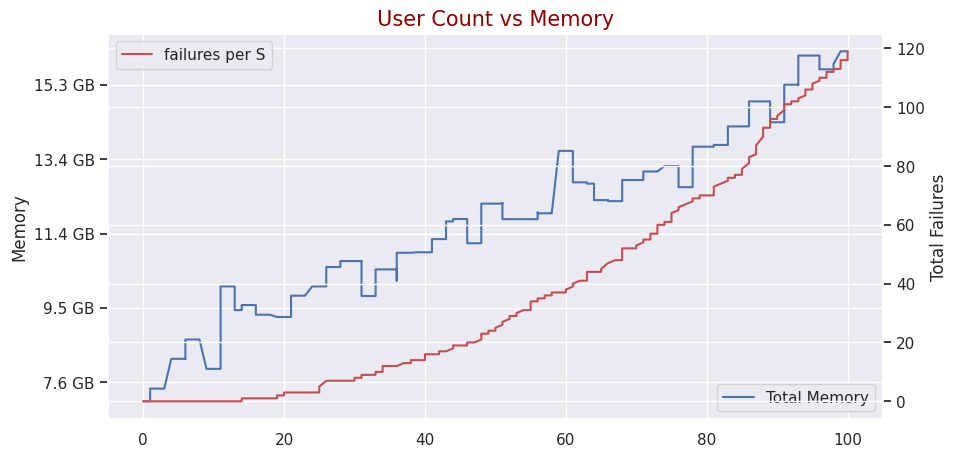

In [100]:
import matplotlib.ticker as tkr  

def sizeof_fmt(x, pos):
    if x<0:
        return ""
    for x_unit in ['kB', 'MB', 'GB', 'TB']:
        if x < 1024.0:
            return "%3.1f %s" % (x, x_unit)
        x /= 1024.0


x = "User Count"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(
#     x,
#     "geoserver_ mem",
#     data=df,
#     color="b",
#     label="GeoServer",
#     # linestyle="-.",
# )
ax.plot(
    x,
    "total_mem",
    data=df,
    color="b",
    label="Total Memory",
    # linestyle="-.",
)

ax.yaxis.set_major_formatter(tkr.FuncFormatter(sizeof_fmt))
ax.set_ylabel('Memory') 
ax.legend(loc=('lower right'))


ax2 = ax.twinx() 
ax2.plot(
    x,
    "Total Failure Count",
    data=df,
    color="r",
    label="failures per S",
    # linestyle="-.",
)

ax2.set_ylabel('Total Failures') 

plt.xlabel("time")
plt.title(x + " vs Memory", fontdict=font)

ax2.legend()


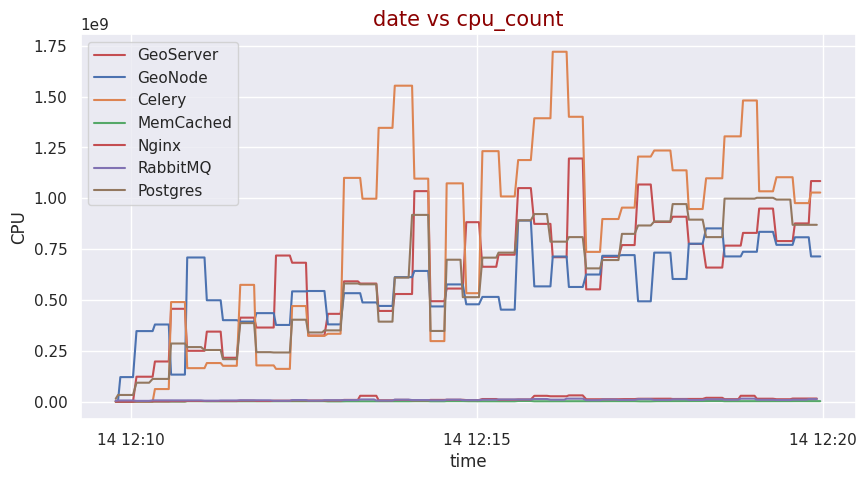

In [19]:

y = "cpu_count"
x = "date"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    x,
    y,
    data=df_geoserver,
    color="r",
    label="GeoServer",
    # linestyle="-.",
)
ax.plot(
    x,
    y,
    data=df_geonode,
    #color="g",
    label="GeoNode",
)
ax.plot(
    x,
    y,
    data=df_celery,
    #color="b",
    label="Celery",
)
ax.plot(
    x,
    y,
    data=df_memcached,
    #color="b",
    label="MemCached",
)
ax.plot(
    x,
    y,
    data=df_nginx,
   # color="b",
    label="Nginx",
)
ax.plot(
    x,
    y,
    data=df_rabbitmq,
    #color="b",
    label="RabbitMQ",
)
ax.plot(
    x,
    y,
    data=df_postgres,
    #color="b",
    label="Postgres",
)
plt.xlabel("time")
plt.ylabel("CPU")
plt.title(x + " vs " + y, fontdict=font)
leg = ax.legend()

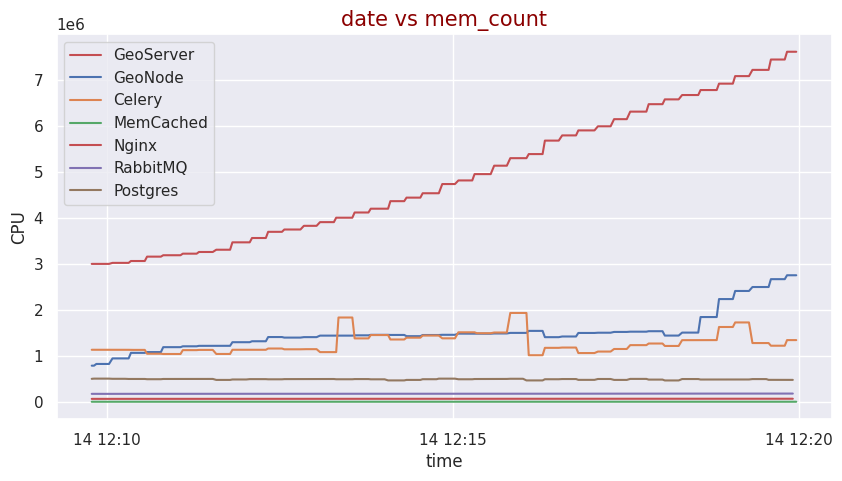

In [20]:
y = "mem_count"
x = "date"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    x,
    y,
    data=df_geoserver,
    color="r",
    label="GeoServer",
    # linestyle="-.",
)
ax.plot(
    x,
    y,
    data=df_geonode,
    #color="g",
    label="GeoNode",
)
ax.plot(
    x,
    y,
    data=df_celery,
    #color="b",
    label="Celery",
)
ax.plot(
    x,
    y,
    data=df_memcached,
    #color="b",
    label="MemCached",
)
ax.plot(
    x,
    y,
    data=df_nginx,
   # color="b",
    label="Nginx",
)
ax.plot(
    x,
    y,
    data=df_rabbitmq,
    #color="b",
    label="RabbitMQ",
)
ax.plot(
    x,
    y,
    data=df_postgres,
    #color="b",
    label="Postgres",
)
plt.xlabel("time")
plt.ylabel("CPU")
plt.title(x + " vs " + y, fontdict=font)
leg = ax.legend()

In [23]:
merged_df = df_geonode.merge(df_geoserver, on=' timestamp', how='inner')
#m_df = merged_df["cpu_count_x"] + merged_df["cpu_count_y"]
merged_df.head()

,name_x,cpu_x,mem_x,timestamp,date_x,cpu_count_x,mem_count_x,name_y,cpu_y,mem_y,date_y,cpu_count_y,mem_count_y
0,geonode,4515339n,790888Ki,1728907787,2024-10-14 12:09:47,4515339,790888,geoserver,1696751n,2999516Ki,2024-10-14 12:09:47,1696751,2999516
1,geonode,4515339n,790888Ki,1728907789,2024-10-14 12:09:49,4515339,790888,geoserver,1696751n,2999516Ki,2024-10-14 12:09:49,1696751,2999516
2,geonode,121189579n,827988Ki,1728907791,2024-10-14 12:09:51,121189579,827988,geoserver,1485354n,2999516Ki,2024-10-14 12:09:51,1485354,2999516
3,geonode,121189579n,827988Ki,1728907793,2024-10-14 12:09:53,121189579,827988,geoserver,1485354n,2999516Ki,2024-10-14 12:09:53,1485354,2999516
4,geonode,121189579n,827988Ki,1728907796,2024-10-14 12:09:56,121189579,827988,geoserver,1485354n,2999516Ki,2024-10-14 12:09:56,1485354,2999516


In [22]:
df_base_mon[' timestamp']

0       1728907787
1       1728907787
2       1728907787
3       1728907787
4       1728907787
           ...    
2071    1728908395
2072    1728908398
2073    1728908398
2074    1728908398
2075    1728908398
Name:  timestamp, Length: 2076, dtype: int64

In [ ]:
df_geonode["mem_count"] = df_geonode[" mem"].apply(
    lambda x: (
        int(x.split("Ki")[0])
        if "Ki" in x
        else int(x.split("Mi")[0]) * 1024 
    )
)

/tmp/ipykernel_3072911/3510568442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geonode["mem_count"] = df_geonode[" mem"].apply(


In [ ]:
df_geonode["cpu_count"].describe()

count    2.600000e+02
mean     5.664920e+08
std      1.817084e+08
min      4.515339e+06
25%      4.685796e+08
50%      5.642121e+08
75%      7.144022e+08
max      8.906691e+08
Name: cpu_count, dtype: float64

In [ ]:
df_geonode["cpu_per_second"].describe()

KeyError: 'cpu_per_second'

<Axes: >

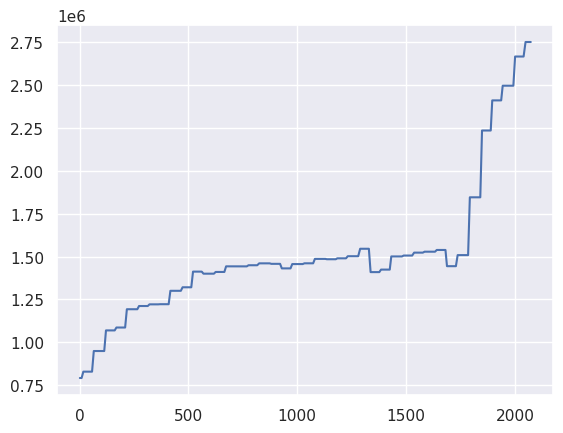

In [ ]:
df_geonode["mem_count"].plot()
# df_geonode.plot()

In [ ]:
df_geonode["cpu_per_second"] = (df_geonode["cpu_count"] / df_geonode[" timestamp"])

/tmp/ipykernel_3072911/4227852180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geonode["cpu_per_second"] = (df_geonode["cpu_count"] / df_geonode[" timestamp"])


Text(0.5, 1.0, ' timestamp vs cpu_per_second')

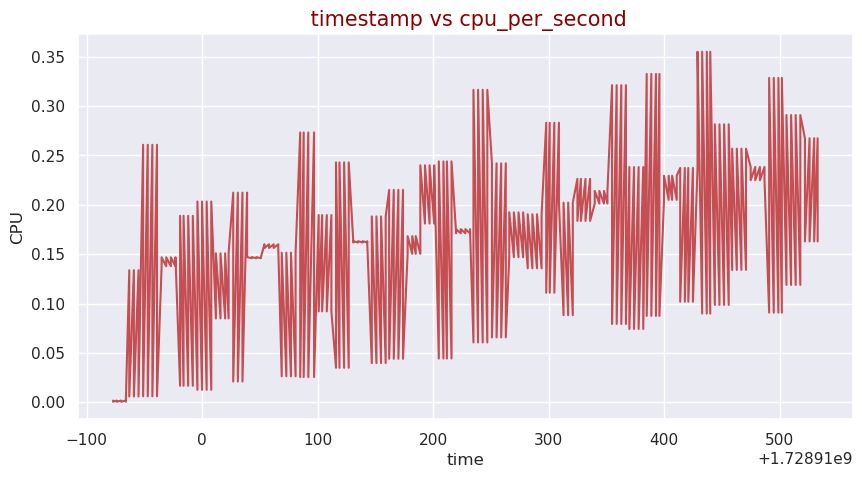

In [ ]:
y = "cpu_per_second"
x = " timestamp"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    x,
    y,
    data=df_geonode,
    color="r",
    label="Base Resource",
    # linestyle="-.",
)
# ax.plot(
#     x,
#     y,
#     data=df_hist2,
#     color="g",
#     label="Replica Resource",
# )
# ax.plot(
#     x,
#     y,
#     data=df_hist3,
#     color="b",
#     label="High Resource",
# )
plt.xlabel("time")
plt.ylabel("CPU")
plt.title(x + " vs " + y, fontdict=font)
# #


# leg = ax.legend()
# ax.legend(frameon=False, loc="lower center", ncol=2)
# fig

Text(0.5, 1.0, ' timestamp vs mem_count')

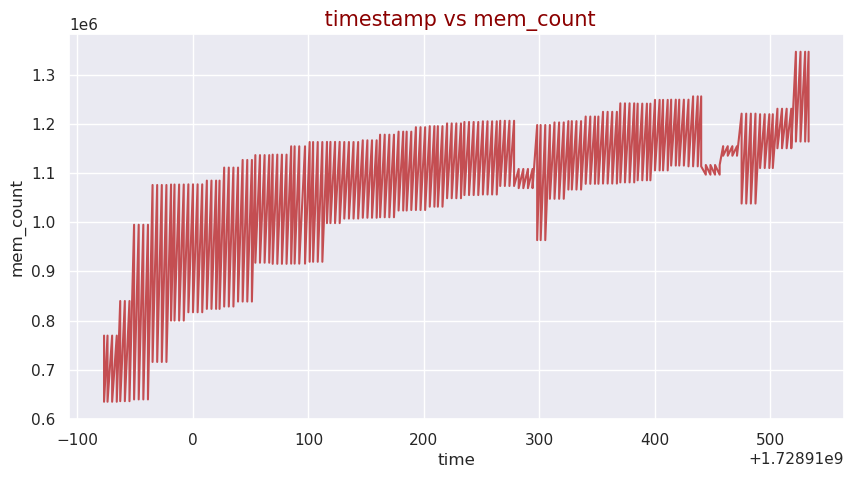

In [ ]:
y = "mem_count"
x = " timestamp"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    x,
    y,
    data=df_geonode,
    color="r",
    label="Base Resource",
    # linestyle="-.",
)
# ax.plot(
#     x,
#     y,
#     data=df_hist2,
#     color="g",
#     label="Replica Resource",
# )
# ax.plot(
#     x,
#     y,
#     data=df_hist3,
#     color="b",
#     label="High Resource",
# )
plt.xlabel("time")
plt.ylabel("mem_count")
plt.title(x + " vs " + y, fontdict=font)
# #


# leg = ax.legend()
# ax.legend(frameon=False, loc="lower center", ncol=2)
# fig

NameError: name 'df_hist' is not defined

<Axes: ylabel='Timestamp'>

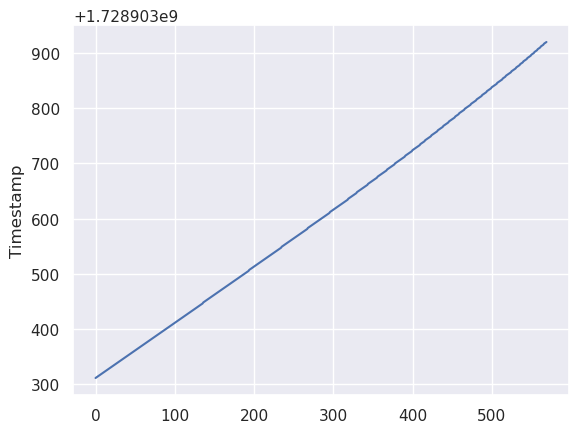

<Axes: >

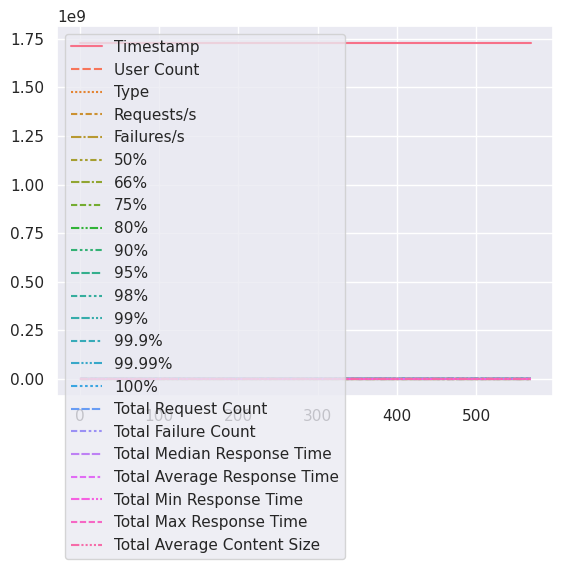

<Axes: xlabel='Timestamp', ylabel='User Count'>

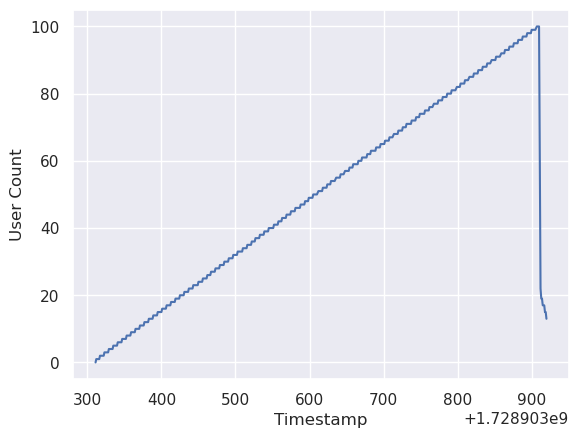

<Axes: xlabel='Timestamp', ylabel='Total Request Count'>

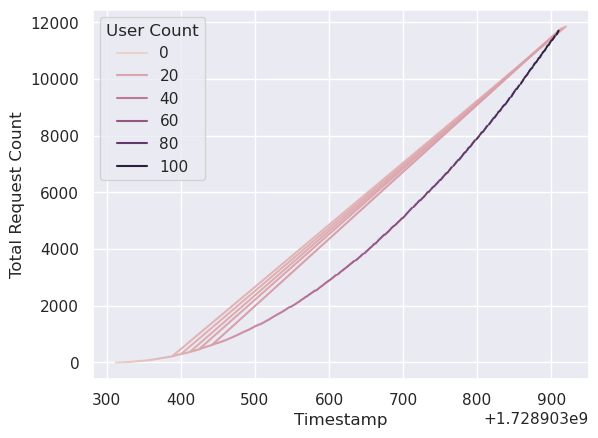

In [ ]:
#agregated by user
sns.lineplot(data=df_hist, x="Timestamp", y="Total Request Count", hue="User Count")

In [ ]:
# user1 = df_hist.query("User Count == '1,'")
# user1.plot(x="Timestamp",y="User Count")

In [ ]:
# col = 'A'
# df2 = df.drop(col,axis=1)
# df2.index = df[col]
# df2.plot(subplots=True, style='.')
# plt.legend(loc='best')
# plt.show()